# Medical Insurance Charges

> Exploratory data analysis and machine learning prediction of medical insurance charges framed as a linear regression problem using Jupyter Notebooks and Power BI.

Exploratory data analyses, linear regression, and interactive dashboard.

https://www.kaggle.com/datasets/mirichoi0218/insurance/data

## ENVIRONMENT

In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## ACQUISITION OF DATA

In [3]:
# Read a csv file
df = pd.read_csv('../data/insurance.csv')

## PREPARATION OF DATA

### Show missing values

In [4]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
age,0,0.0,0,0.0,0,0.0
sex,0,0.0,0,0.0,0,0.0
bmi,0,0.0,0,0.0,0,0.0
children,0,0.0,0,0.0,0,0.0
smoker,0,0.0,0,0.0,0,0.0
region,0,0.0,0,0.0,0,0.0
charges,0,0.0,0,0.0,0,0.0


In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> - Categorical features: sex, smoker, region
> - Numerical features: age, bmi, children
> - Target variable: charges

### Show normalized value counts

In [8]:
def show_value_counts(df, columns=None, normalize=False):
    """
    Display value counts for specified columns in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - columns (list, optional): List of column names to analyze. If None, all columns are analyzed.
    - normalize (bool, optional): Whether to normalize counts to proportions. Default is False.
    
    Returns:
    - dict: A dictionary with column names as keys and value counts as values (as Pandas Series).
    """
    if columns is None:
        columns = df.columns  # Use all columns if none are specified
    
    value_counts = {}
    for col in columns:
        if col in df.columns:
            value_counts[col] = df[col].value_counts(normalize=normalize)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
    
    return value_counts

In [9]:
# Value counts for specific columns
specific_counts = show_value_counts(df, columns=['sex', 'children', 'smoker', 'region'], normalize=True)
for col, counts in specific_counts.items():
    print(f"Normalized value counts for column '{col}':")
    print(counts)
    print("\n=======================================================\n")

Normalized value counts for column 'sex':
sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64


Normalized value counts for column 'children':
children
0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: proportion, dtype: float64


Normalized value counts for column 'smoker':
smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64


Normalized value counts for column 'region':
region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: proportion, dtype: float64




In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## EDA

### Descriptive Statistics

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Axes(0.125,0.11;0.775x0.77)


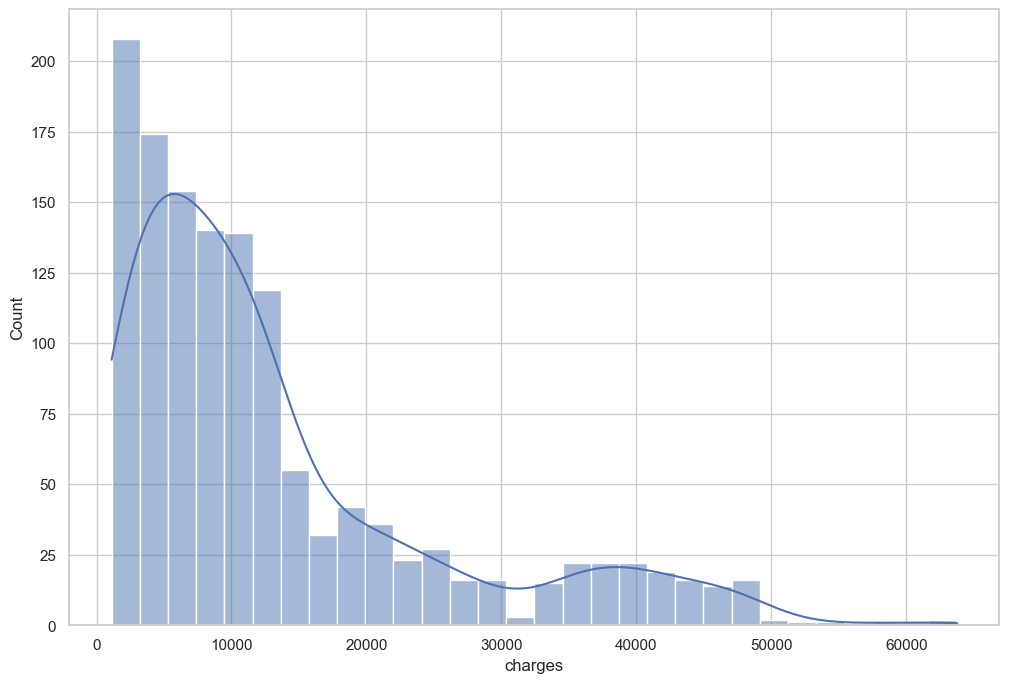

In [12]:
f, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(df['charges'], kde=True)
print(ax)
plt.show()

> The distribution is skewed to the right. We need to do a log transform to reduce this.

In [13]:
# Apply log transformation to 'charges'
df['log_charges'] = np.log(df['charges'])

### Analysis of region

Text(0.5, 0, 'Total Charges')

Text(0, 0.5, 'Region')

Text(0.5, 1.0, 'Total Charges by Region')

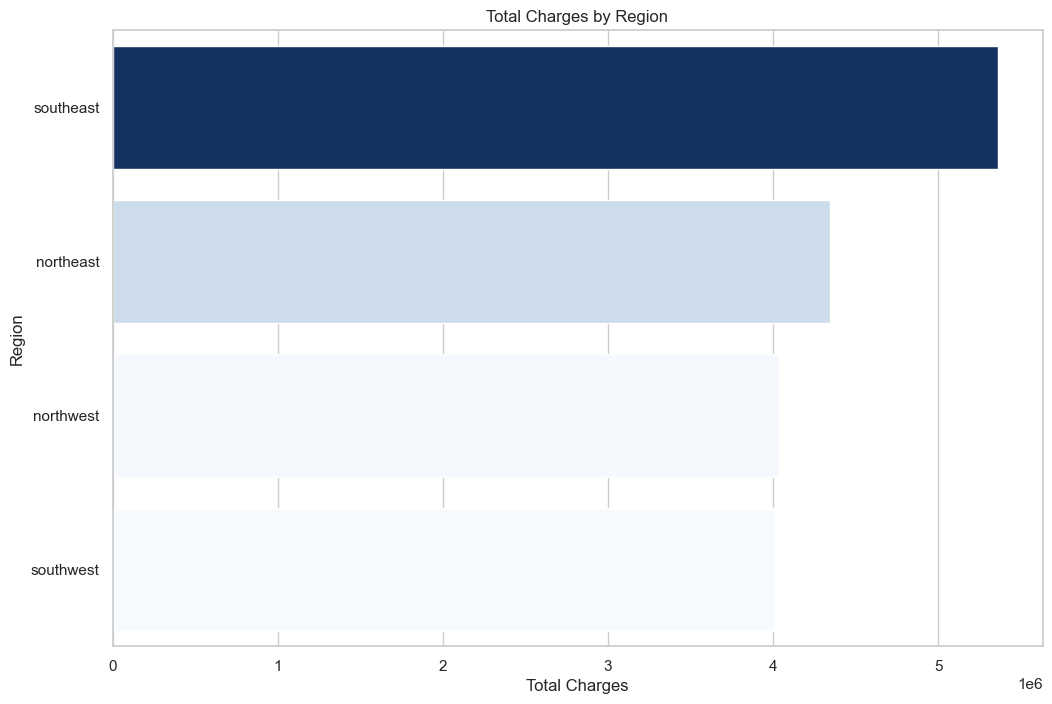

In [14]:
# Grouping the charges by region, summing them, and sorting the values
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=False)

# Creating a bar plot
f, ax = plt.subplots(1, 1, figsize=(12, 8))

# Correctly specifying x and y parameters for the barplot
# Using .reset_index() to convert the Series to a DataFrame for easier plotting
charges_df = charges.head().reset_index()

# Now using the DataFrame columns for plotting
ax = sns.barplot(x='charges', y='region', data=charges_df, palette='Blues', hue='charges', legend=False)

# Adding labels for clarity (optional)
ax.set_xlabel('Total Charges')
ax.set_ylabel('Region')
ax.set_title('Total Charges by Region')

### Mapping and encoding categorical features

In [15]:
df['sex']=df['sex'].map({'male':0, 'female':1})
df['smoker']=df['smoker'].map({'no':0, 'yes':1})
df['region']=df['region'].map({'northwest':0, 'northeast':1, 'southwest':2, 'southeast':3})

In [16]:
df.head()
df.tail()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,1,27.900,0,1,2,16884.92400,9.734176
1,18,0,33.770,1,0,3,1725.55230,7.453302
2,28,0,33.000,3,0,3,4449.46200,8.400538
3,33,0,22.705,0,0,0,21984.47061,9.998092
4,32,0,28.880,0,0,0,3866.85520,8.260197


,age,sex,bmi,children,smoker,region,charges,log_charges
1333,50,0,30.97,3,0,0,10600.5483,9.268661
1334,18,1,31.92,0,0,1,2205.9808,7.698927
1335,18,1,36.85,0,0,3,1629.8335,7.396233
1336,21,1,25.80,0,0,2,2007.9450,7.604867
1337,61,1,29.07,0,1,0,29141.3603,10.279914


### Correlation between variables

<Axes: >

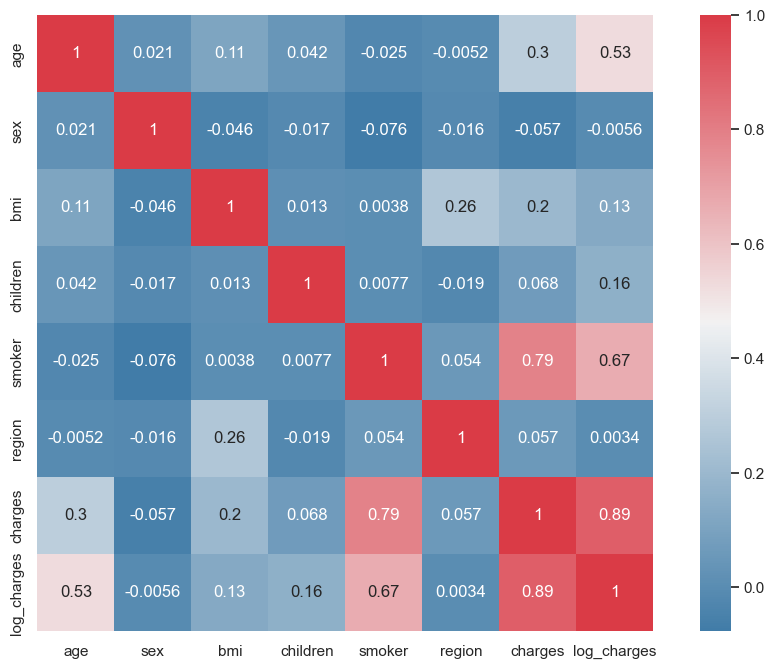

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
corr = df.corr()

# Plot the heatmap with annotations
sns.heatmap(corr, cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

> The target variable is dependent on multiple factors, including age and BMI, with __smoker status__ being a highly significant determinant

### Analysis of smoker status

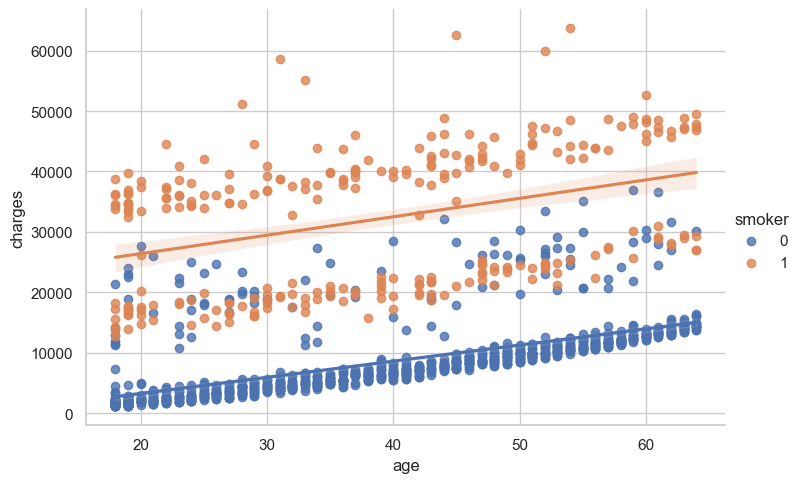

In [18]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', height=5, aspect=1.5)

Text(0.5, 1.0, 'Distribution of Smoking Status by Gender')

Text(0.5, 12.44444444444443, 'Smoking Status (Yes/No)')

Text(12.770324074074077, 0.5, 'Count')

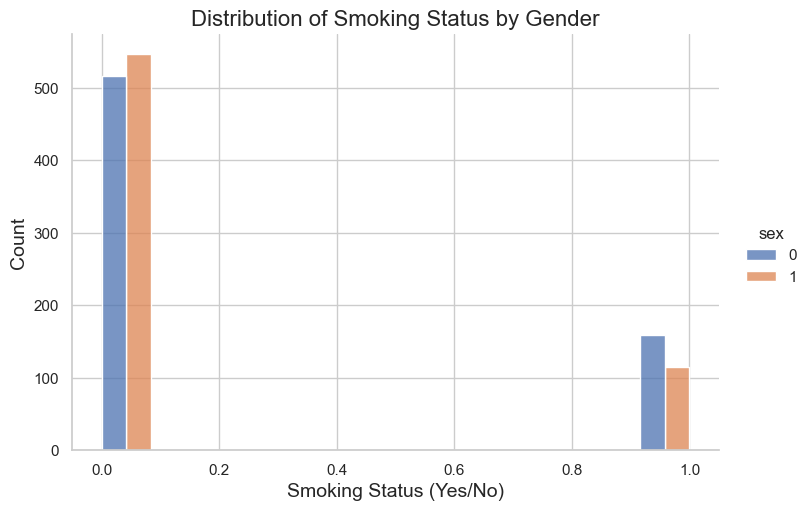

In [19]:
sns.displot(df, x="smoker", hue="sex", multiple="dodge", height=5, aspect=1.5)

plt.title("Distribution of Smoking Status by Gender", fontsize=16)
plt.xlabel("Smoking Status (Yes/No)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

> There are more non-smokers (denoted by 0) than smokers (denoted by 1) in the dataset. Additionally, males (denoted by 0) tend to smoke more than females (denoted by 1).

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution of Smokers')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': 'Age Distribution of Smokers'}, xlabel='Age', ylabel='Frequency'>

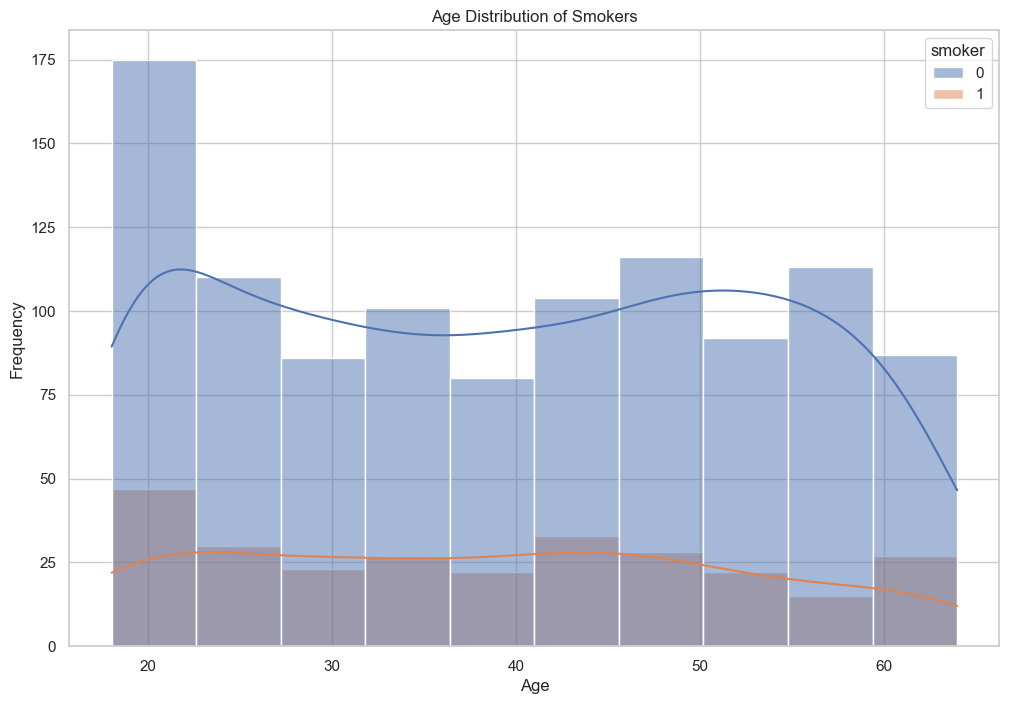

In [20]:
plt.figure(figsize=(12, 8))
plt.title('Age Distribution of Smokers')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.histplot(data=df, x='age', hue='smoker', kde=True, bins=10)

> It is concerning that the majority of smokers are in their 20s, with a smaller proportion also in their 50s. This raises the question: will individuals in their 20s have to pay higher insurance premiums due to their smoking habits?

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Health Insurance Charges by Smoking Status')

Text(0.5, 0, 'Smoking Status (Yes/No)')

Text(0, 0.5, 'Charges ($)')

<Axes: title={'center': 'Health Insurance Charges by Smoking Status'}, xlabel='Smoking Status (Yes/No)', ylabel='Charges ($)'>

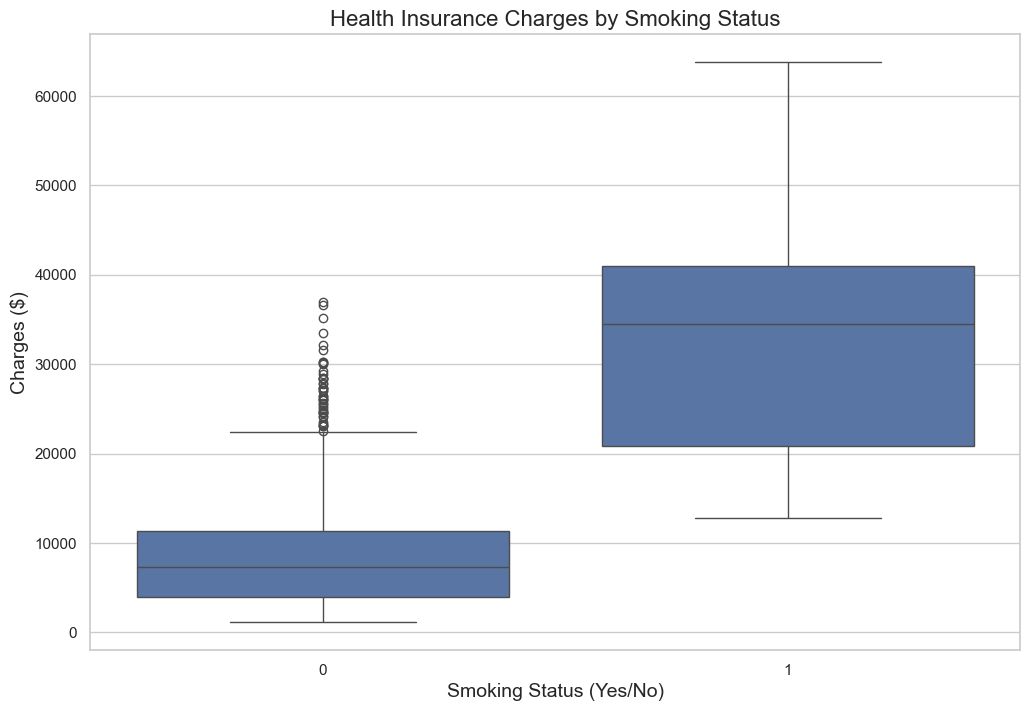

In [21]:
plt.figure(figsize=(12, 8))
plt.title("Health Insurance Charges by Smoking Status", fontsize=16)
plt.xlabel("Smoking Status (Yes/No)", fontsize=14)
plt.ylabel("Charges ($)", fontsize=14)
sns.boxplot(data=df, x="smoker", y="charges")

> It is evident that individuals who smoke incur higher charges compared to non-smokers, likely due to health issues or medical conditions associated with smoking.

<Axes: xlabel='smoker', ylabel='charges'>

Text(0.5, 1.0, 'Distribution of Charges by Smoking Status and Sex')

Text(0.5, 0, 'Smoking Status (Yes/No)')

Text(0, 0.5, 'Charges ($)')

<Axes: xlabel='smoker', ylabel='charges'>

Text(0.5, 1.0, 'Mean Charges by Smoking Status and Sex')

Text(0.5, 0, 'Smoking Status (Yes/No)')

Text(0, 0.5, '')

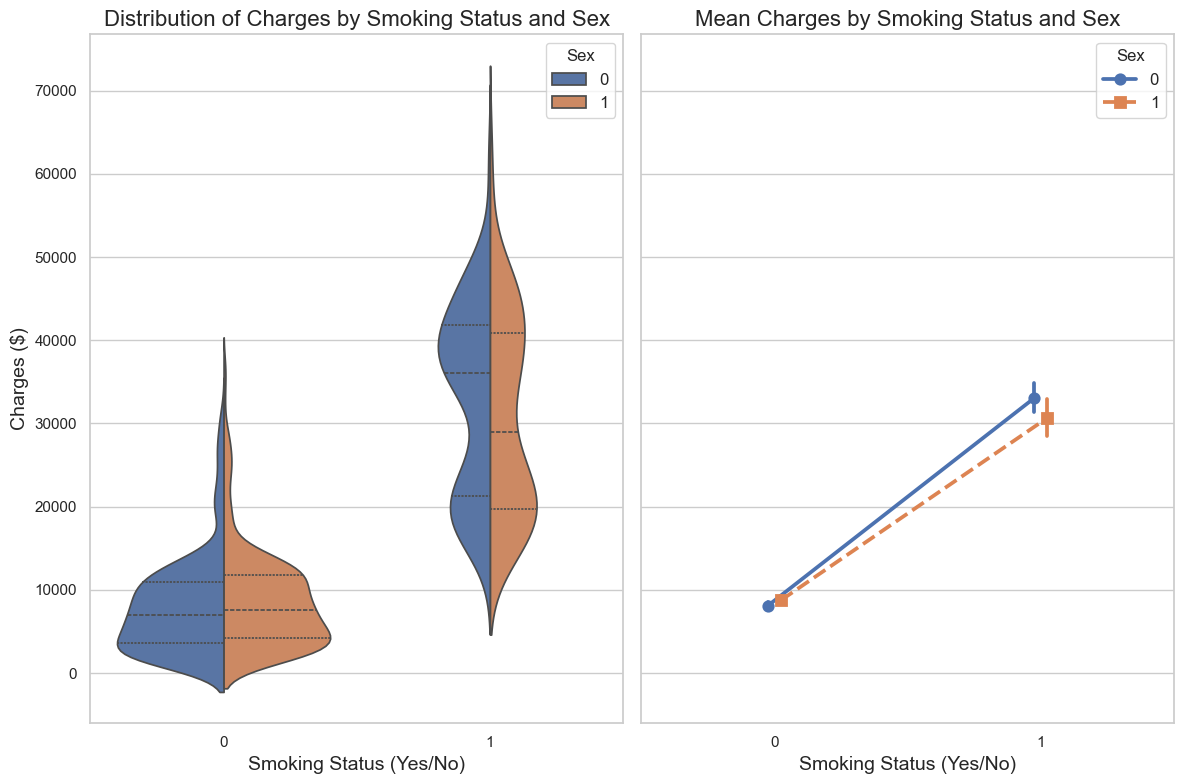

In [22]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharey=True)  # 1 row, 2 columns, shared y-axis

# Violin Plot
sns.violinplot(data=df, x="smoker", y="charges", hue="sex", split=True, inner="quartile", ax=axes[0])
axes[0].set_title("Distribution of Charges by Smoking Status and Sex", fontsize=16)
axes[0].set_xlabel("Smoking Status (Yes/No)", fontsize=14)
axes[0].set_ylabel("Charges ($)", fontsize=14)
axes[0].legend(title="Sex", fontsize=12)

# Point Plot
sns.pointplot(data=df, x="smoker", y="charges", hue="sex", dodge=True, markers=["o", "s"], linestyles=["-", "--"], ax=axes[1])
axes[1].set_title("Mean Charges by Smoking Status and Sex", fontsize=16)
axes[1].set_xlabel("Smoking Status (Yes/No)", fontsize=14)
axes[1].set_ylabel("")  # No label here since the y-axis is shared
axes[1].legend(title="Sex", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

> Smoking males tend to spend slightly more on insurance compared to others, while non-smoking females also incur slightly higher insurance costs.

### Analysis of BMI

Text(0.5, 1.0, 'Distribution of BMI')

Text(0.5, 12.44444444444443, 'BMI')

Text(8.319444444444445, 0.5, 'Count')

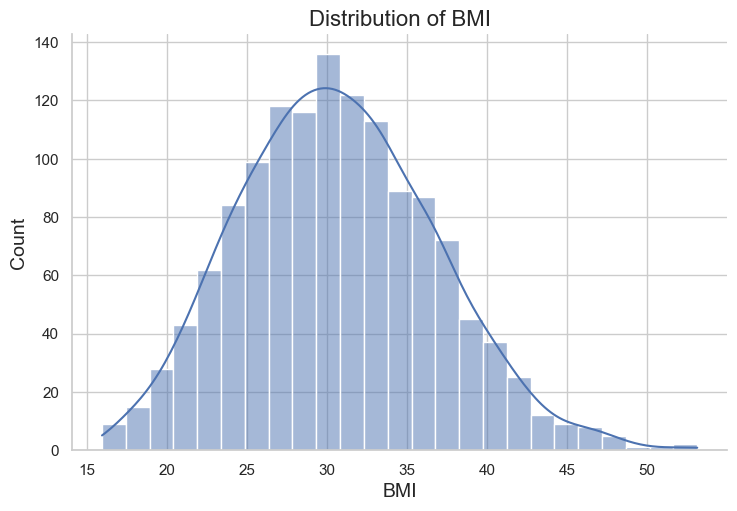

In [23]:
sns.displot(df, x="bmi", kde=True, height=5, aspect=1.5)

# Customizing the plot
plt.title("Distribution of BMI", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

> Most individuals have a BMI close to 30, which is significantly higher than the normal range of 18-24. Let's examine how this impacts their medical insurance charges.

<Axes: xlabel='bmi', ylabel='charges'>

Text(0.5, 1.0, 'BMI vs Charges with Regression Line')

Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Charges')

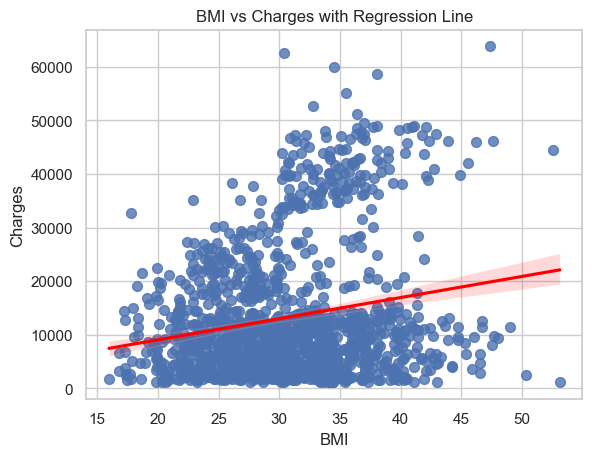

In [24]:
sns.regplot(data=df, x='bmi', y='charges', scatter_kws={'s': 50}, line_kws={"color": "red"})

# Display the plot
plt.title('BMI vs Charges with Regression Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

> Our assumption holds true: higher BMI is associated with higher insurance premiums.

Text(0.5, 1.0, 'Distribution of BMI')

Text(0.5, 12.44444444444443, 'BMI')

Text(21.145324074074075, 0.5, 'Count')

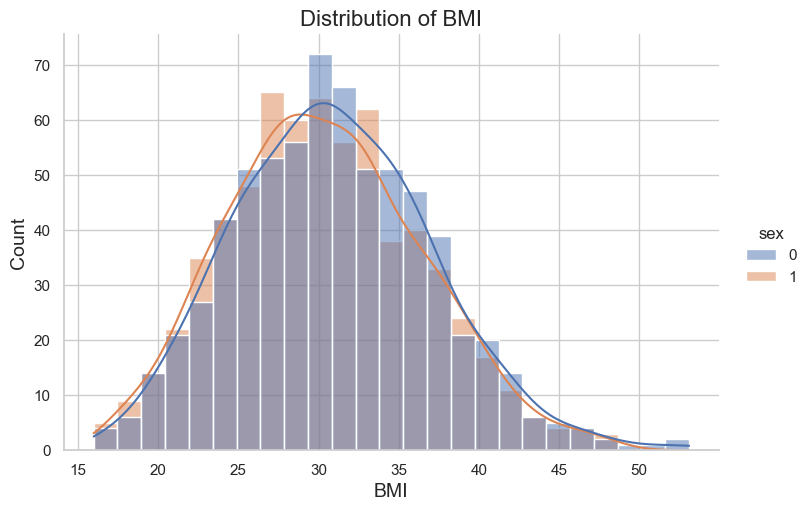

In [25]:
sns.displot(df, x="bmi", kde=True, hue="sex", height=5, aspect=1.5)

# Customizing the plot
plt.title("Distribution of BMI", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

> Most of the time, males tend to have a higher BMI compared to females.

## MODELING

### Train Test Split

In [26]:
# Define features (X) and log-transformed target (y)
X = df.drop(['charges', 'log_charges', 'region'], axis=1)  # Drop unused columns
y = df['log_charges']

### Polynomial Features

In [27]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(x_quad,y, random_state = 493)

### Standard Scaling

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [29]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions using Linear Regression
y_pred_linear_log = linear_model.predict(X_test)

# Evaluation for Linear Regression
mse_linear_log = mean_squared_error(y_test, y_pred_linear_log)
r2_linear_log = r2_score(y_test, y_pred_linear_log)
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_linear_log:.2f}")
print(f"R^2 Score: {r2_linear_log:.2f}")
print("\n")

# Convert predictions back to the original scale
y_pred_linear_original = np.exp(y_pred_linear_log)

# Evaluate on the original scale
y_test_linear_original = np.exp(y_test)  # Inverse transform actual values
mse_linear_original = mean_squared_error(y_test_linear_original, y_pred_linear_original)
print(f"Original Scale MSE: {mse_linear_original:.2f}")
print("\n")

LinearRegression()

Linear Regression Results:
Mean Squared Error: 0.14
R^2 Score: 0.82


Original Scale MSE: 24899050.64




### Ridge Regression

In [30]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha to control regularization strength
ridge_model.fit(X_train, y_train)

# Predictions using Ridge Regression
y_pred_ridge_log = ridge_model.predict(X_test)

# Evaluation for Ridge Regression
mse_ridge_log = mean_squared_error(y_test, y_pred_ridge_log)
r2_ridge_log = r2_score(y_test, y_pred_ridge_log)
print("Ridge Regression Results:")
print(f"Mean Squared Error: {mse_ridge_log:.2f}")
print(f"R^2 Score: {r2_ridge_log:.2f}")
print("\n")

# Convert predictions back to the original scale
y_pred_ridge_original = np.exp(y_pred_ridge_log)

# Evaluate on the original scale
y_test_ridge_original = np.exp(y_test)  # Inverse transform actual values
mse_ridge_original = mean_squared_error(y_test_ridge_original, y_pred_ridge_original)
print(f"Original Scale MSE: {mse_ridge_original:.2f}")
print("\n")

Ridge()

Ridge Regression Results:
Mean Squared Error: 0.14
R^2 Score: 0.82


Original Scale MSE: 25027854.69




### Feature importance

In [31]:
# Get feature names
feature_names = quad.get_feature_names_out(X.columns) 

# Extract coefficients
coefficients = linear_model.coef_

In [32]:
# Combine feature names and coefficients into a DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add absolute values to sort by importance
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()

# Sort by absolute coefficient value
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 10 important features
print(feature_importance.head(10))

         Feature  Coefficient  Abs_Coefficient
1            age     0.800387         0.800387
17    bmi smoker     0.654838         0.654838
10    age smoker    -0.568252         0.568252
4       children     0.445186         0.445186
3            bmi     0.307091         0.307091
15         bmi^2    -0.305176         0.305176
5         smoker     0.288294         0.288294
20      smoker^2     0.288294         0.288294
9   age children    -0.231303         0.231303
6          age^2    -0.105856         0.105856


<Figure size 1200x800 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 0, 'Absolute Coefficient Value')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Top 10 Important Features in Linear Regression')

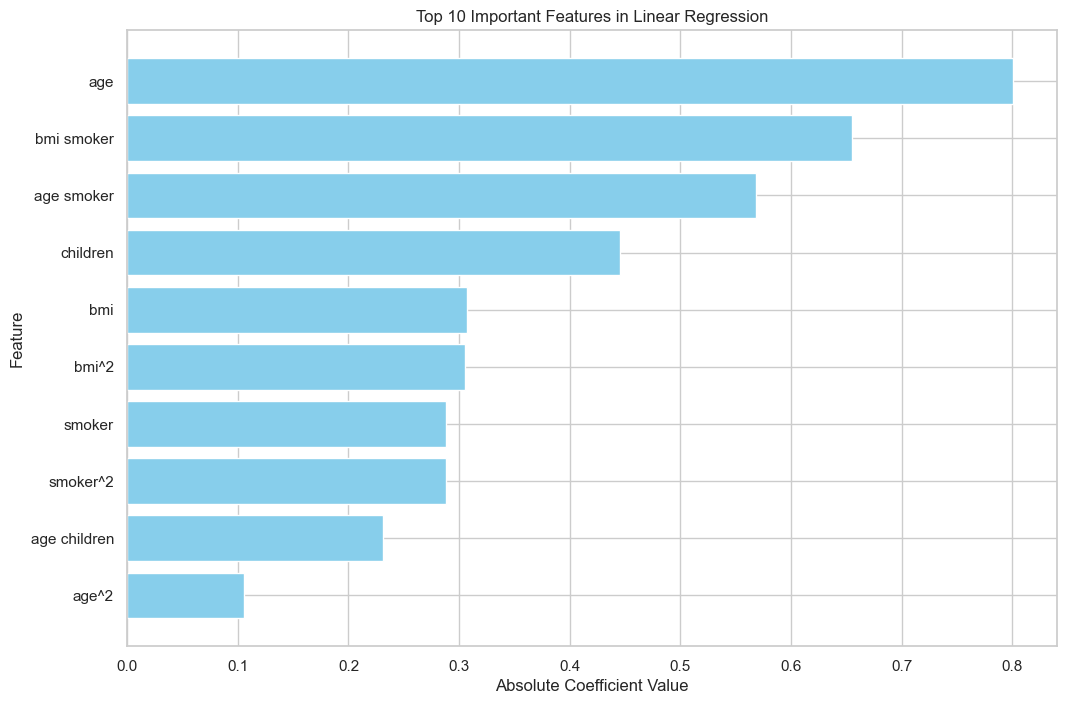

In [33]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'][:10], feature_importance['Abs_Coefficient'][:10], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Important Features in Linear Regression')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

### Key Interpretations

#### 1. Relative Importance of Features

__age (Coefficient: 0.800387):__

This is the most important feature based on the absolute coefficient value.
A unit increase in age (e.g., one additional year) is associated with an average increase of 0.800387 in the target variable (charges), assuming other variables remain constant.

__bmi smoker (Coefficient: 0.654838):__

This interaction term indicates that the combined effect of bmi and smoker is significant.
A unit increase in this combined factor increases charges by approximately 0.654838.

__age smoker (Coefficient: -0.568252):__

This negative coefficient suggests that the combined effect of age and smoker reduces charges by approximately 0.568252 for a unit increase, which could be due to a compensating effect or complex relationship.

#### 2. Positive and Negative Effects

__Positive Coefficients:__

- Features like age, bmi smoker, children, and bmi have positive coefficients, indicating they increase charges.
- Example: Having more children (children) or a higher BMI (bmi) contributes to higher insurance charges.

__Negative Coefficients:__

- Features like age smoker, bmi^2, and age children have negative coefficients, implying they reduce charges.
- Example: The quadratic term bmi^2 suggests diminishing or reversing effects of BMI on charges when BMI becomes very high.

#### 3. Interactions and Non-Linear Effects

__Interaction Terms:__

- bmi smoker, age smoker, and age children represent interactions between variables.
- Example: The interaction bmi smoker suggests that the charges increase significantly for individuals who smoke and have a high BMI.

__Quadratic Terms (bmi^2, age^2):__

- These indicate non-linear relationships.
- Example: bmi^2 with a negative coefficient suggests that while bmi initially increases charges, the effect diminishes or reverses at higher BMI levels.

#### 4. Magnitude of Coefficients

- The absolute coefficient value (Abs_Coefficient) indicates the strength of the feature's impact on the target.
- Features with larger absolute coefficients have a greater influence.
  - Example: age (0.800387) has a much larger impact than age^2 (-0.105856).

### Practical Implications

__1. Age is a Primary Factor:__ Age has the largest positive impact on insurance charges, likely reflecting increased health risks or medical needs as people grow older.

__2. Smoking's Influence:__ The combined effects of smoking (e.g., bmi smoker, age smoker) show a significant influence, highlighting the added cost burden for smokers.  

__3. Children's Effect:__ More children slightly increase charges, possibly due to family insurance plans.  

__4. BMI's Role:__ BMI is positively correlated with charges, but its quadratic term (bmi^2) suggests a complex relationship where the increase levels off or reverses at very high BMI values.  

__5. Interactions and Complexity:__ Interactions like bmi smoker reveal that the combination of multiple factors (e.g., high BMI and smoking) has a compounding effect on charges.  

### Actionable Insights

#### 1. Policy Design:

Insurance providers might focus on age and lifestyle factors like smoking to adjust premiums.

#### 2. Health Interventions:

Programs targeting smoking cessation and BMI management could help reduce overall medical costs.

#### 3. Model Refinement:

Including these interaction terms and quadratic terms ensures the model captures more complex relationships, improving prediction accuracy.

  
  __This analysis highlights the importance of examining both individual and combined effects of features to understand their influence on the target variable.__